## Import libraries and set random seed for reproducibility
We will be using matplotlib to plot the digits, keras to build the neural network, csv and XlsxWriter to write csv and excel files, and of course, numpy.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop, Adadelta
from keras.utils import np_utils

from __future__ import print_function

import csv
import xlsxwriter
from xlsxwriter.workbook import Workbook

import numpy as np
import random

Using Theano backend.


## Set random seed
This is useful for reproducibility

In [5]:
print(np.random.uniform(0,1,1))

[ 0.77707816]


In [7]:
np.random.seed(1337)
print(np.random.uniform(0,1,1))

[ 0.26202468]


In [8]:
np.random.seed(1337)

## Import MNIST - Handwritten Digits data set and split into train and test sets

In [9]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape:", X_train.shape)
print("y_train original shape:", y_train.shape)

X_train original shape: (60000L, 28L, 28L)
y_train original shape: (60000L,)


## Look at first 6 examples from the training set

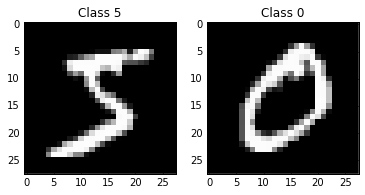

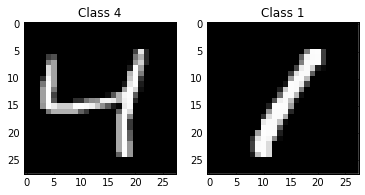

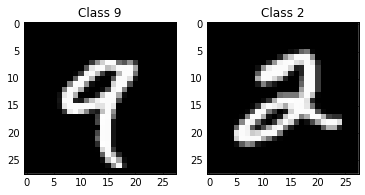

In [10]:
plt.figure()
for i in range(2):
    plt.subplot(1,2, i + 1)
    plt.imshow(X_train[i], cmap = 'gray', interpolation = 'none')
    plt.title("Class {}".format(y_train[i]))
plt.figure()
for i in range(2):
    plt.subplot(1,2, i + 1)
    plt.imshow(X_train[i + 2], cmap = 'gray', interpolation = 'none')
    plt.title("Class {}".format(y_train[i + 2]))
plt.figure()
for i in range(2):
    plt.subplot(1,2, i + 1)
    plt.imshow(X_train[i + 4], cmap = 'gray', interpolation = 'none')
    plt.title("Class {}".format(y_train[i + 4]))

## Understand label

In [11]:
print(y_train[0:6])

[5 0 4 1 9 2]


## Write first digit of training set to csv

In [12]:
digit_csv_file = 'C:\\Users\\ddidericksen\\Desktop\\first_digit.csv'

In [13]:
with open(digit_csv_file, 'wb') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerows(X_train[0])

## Write first two digits of training set to excel

In [14]:
digit_xlsx_file = 'C:\\Users\\ddidericksen\\Desktop\\first_two_digits.xlsx'

#### Write 1st Digit

In [15]:
book = Workbook(digit_xlsx_file, {'constant_memory': True})
sheet1 = book.add_worksheet(name = 'Digit_1')
sheet1.set_column(0, 28, 2)
sheet1.conditional_format(0, 0, 28, 28, {'type': '3_color_scale'})

In [16]:
for x in range(X_train.shape[1]):
    for y in range(X_train.shape[2]):
        sheet1.write(x, y, X_train[0,x,y])

#### Write 2nd Digit

In [17]:
sheet2 = book.add_worksheet(name = 'Digit_2')
sheet2.set_column(0, 28, 2)
sheet2.conditional_format(0, 0, 28, 28, {'type': '3_color_scale'})

In [18]:
for x in range(X_train.shape[1]):
    for y in range(X_train.shape[2]):
        sheet2.write(x, y, X_train[1,x,y])

#### Close Book - The file won't actually be written until this command is executed

In [19]:
book.close()

## Understand training data set

In [20]:
print(X_train[0, 5, 0:28]) # 6th row of data

[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0]


In [21]:
print(X_train[0, 5, :]) # exact same as above

[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
 175  26 166 255 247 127   0   0   0   0]


In [22]:
print(X_train[0, :, 7]) # 8th column of data

[  0   0   0   0   0   0   0  49  18   0   0   0   0   0   0   0   0   0
   0   0   0   0 171 253 253   0   0   0]


## Transform data into preferred format for neural network
Our simple neural network will need a single vector for each training example, so we need to reshape the input so that each 28 x 28 pixel image is transformed to one row with 784 columns. If we were training a convolutional neural network, we would not want to do this because the spatial representation is important. We'll change the data type to 32-bit float and scale the inputs from [0-255] to be in the range [0-1].

In [23]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255 # same as X_train = X_train / 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [24]:
print("X_train transformed shape", X_train.shape)
print("y_train transformed shape", y_train.shape)

X_train transformed shape (60000L, 784L)
y_train transformed shape (60000L,)


## Convert label vectors into binary matrices

In [25]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_train.shape)

(60000L, 10L)


In [26]:
print(y_train[0])
print(Y_train[0])

5
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [27]:
print(y_train[1])
print(Y_train[1])

0
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


## Create neural network layers
Two hidden layers of 512 neurons each with Rectified Linear Unit (ReLU) activation function and 20% neuron dropout probability.

In [28]:
model = Sequential()

# Hidden Layer 1
model.add(Dense(512, input_shape = (784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2)) # regularization technique that prevents overfitting

## Hidden Layer 2
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

## Output Layer
model.add(Dense(10)) # the ten classes (0-9)
model.add(Activation('softmax'))

## Ensure the model summary matches our desired network structure
<img src="figure.png", align="left">

In [29]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
dense_1 (Dense)                    (None, 512)         401920      dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)          (None, 512)         0           dense_1[0][0]                    
____________________________________________________________________________________________________
dropout_1 (Dropout)                (None, 512)         0           activation_1[0][0]               
____________________________________________________________________________________________________
dense_2 (Dense)                    (None, 512)         262656      dropout_1[0][0]                  
___________________________________________________________________________________________

## Compile the model to run efficiently on CPU (C++) or GPU (CUDA)

In [30]:
model.compile(loss = 'categorical_crossentropy'
              , optimizer = Adadelta()
              , metrics = ['accuracy'])

## Train the neural net
Batch size is the number of training examples in one forward and backward pass. Mini batches provide a number of benefits in performance and efficiency over batch learning and one-at-a-time online learning. An epoch equates to one forward pass and one backward pass of all training examples.

In [31]:
model.fit(X_train
          , Y_train
          , batch_size = 128
          , nb_epoch = 5
          , verbose = 2
          , validation_split = 0.15)

Train on 51000 samples, validate on 9000 samples
Epoch 1/5
14s - loss: 0.3930 - acc: 0.8851 - val_loss: 0.1606 - val_acc: 0.9540
Epoch 2/5
13s - loss: 0.1667 - acc: 0.9506 - val_loss: 0.1150 - val_acc: 0.9686
Epoch 3/5
13s - loss: 0.1195 - acc: 0.9642 - val_loss: 0.0947 - val_acc: 0.9733
Epoch 4/5
13s - loss: 0.0922 - acc: 0.9722 - val_loss: 0.0860 - val_acc: 0.9739
Epoch 5/5
13s - loss: 0.0771 - acc: 0.9767 - val_loss: 0.0842 - val_acc: 0.9757


## Evaluate it's performance on the test set

In [32]:
score = model.evaluate(X_test
                       , Y_test
                       , verbose = 0)
print('Test Accuracy:', score[1])

Test Accuracy: 0.9746


## Inspect the output
Look at a few examples that were correctly classified and a few that were incorrectly classified by our model

In [33]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test, verbose = 0)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [34]:
print(correct_indices[0:6])

[0 1 2 3 4 5]


In [35]:
print(incorrect_indices[0:6])

[  8 151 233 247 259 320]


#### View a sample of correctly classified digits

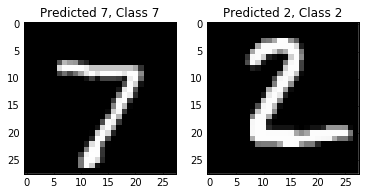

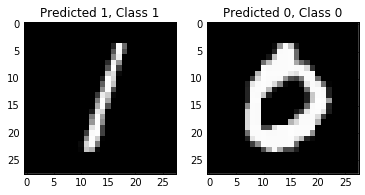

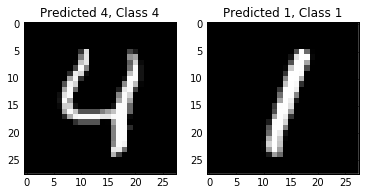

In [36]:
plt.figure()
for i, correct in enumerate(correct_indices[:2]): # enumerate(correct_indices[:2]) returns tuples (1, correct_indices[0]) and (2, correct_indices[1])
    plt.subplot(1, 2, i + 1)
    plt.imshow(X_test[correct].reshape(28,28), cmap = 'gray', interpolation = 'none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.figure()
for i, correct in enumerate(correct_indices[2:4]):
    plt.subplot(1, 2, i + 1)
    plt.imshow(X_test[correct].reshape(28,28), cmap = 'gray', interpolation = 'none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.figure()
for i, correct in enumerate(correct_indices[4:6]):
    plt.subplot(1, 2, i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap = 'gray', interpolation = 'none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

#### View a sample of misclassified digits

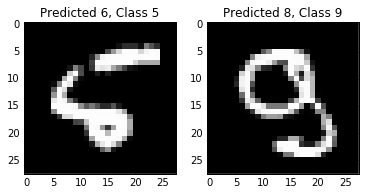

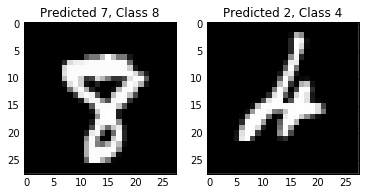

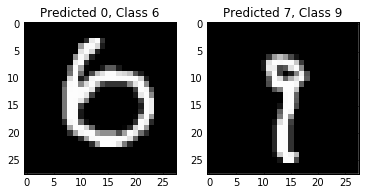

In [37]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:2]):
    plt.subplot(1,2,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.figure()
for i, incorrect in enumerate(incorrect_indices[2:4]):
    plt.subplot(1,2,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.figure()
for i, incorrect in enumerate(incorrect_indices[4:6]):
    plt.subplot(1,2,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))